In [21]:
import pandas as pd
df = pd.read_csv('DataSets/churn_prediction.csv')
df.head()
# df.shape
# df.info()
# df.columns

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
print('---Cleaning and Preparing the DataSet-----')
# 1. Droping irrelevent column.
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
existing_columns_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_drop:
    df_churn_cleaned = df.drop(columns=existing_columns_drop)
    print(f'Drop irrelevent columns: {existing_columns_drop}')
else:
    df_churn_cleaned = df.copy()

print(f'\nDataFrame shape after droping columns: {df_churn_cleaned.shape}') 
df_churn_cleaned.head()  

---Cleaning and Preparing the DataSet-----
Drop irrelevent columns: ['RowNumber', 'CustomerId', 'Surname']

DataFrame shape after droping columns: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# 2. Identify Features (X) and Target (Y)
# Our target variable is 'Exited'
Y = df_churn_cleaned['Exited']
X = df_churn_cleaned.drop("Exited", axis=1) 
print(f'\nFeatures (X) Shapea: {X.shape}')
print(f'\nTarget (Y) Shapea: {Y.shape}')
Y.head()
print("DataSet is cleaned and perpared for encoding")



Features (X) Shapea: (10000, 10)

Target (Y) Shapea: (10000,)
DataSet is cleaned and perpared for encoding


In [23]:
print('---Encoding Categorical Features----')
categorical_cols_to_encode = X.select_dtypes(include='object').columns
print(f'Categorical columns indentified for encoding: {list(categorical_cols_to_encode)}')
# Apply one-hot coding 
X_encoded = pd.get_dummies(X, columns=categorical_cols_to_encode, drop_first=True, dtype=int)
print(f'Features (X) shape after encoding: {X_encoded.shape}')
print("\nCategorical features encoded successfully!")
X_encoded.head(16)


---Encoding Categorical Features----
Categorical columns indentified for encoding: ['Geography', 'Gender']
Features (X) shape after encoding: (10000, 11)

Categorical features encoded successfully!


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression

print('----Training classification model (logistic Regression)----')
# 1. Split data into training and testing data set.
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42, stratify=Y)
print(f'\n Training set features (X_train) shape: {X_train.shape}')
print(f'\n Training set features (X_test) shape: {X_test.shape}')
print(f'\n Training set target (Y_train) shape: {X_train.shape}')
print(f'\n Training set target (Y_test) shape: {Y_test.shape}')


----Training classification model (logistic Regression)----

 Training set features (X_train) shape: (8000, 11)

 Training set features (X_test) shape: (2000, 11)

 Training set target (Y_train) shape: (8000, 11)

 Training set target (Y_test) shape: (2000,)


In [27]:
# ----- 2. Train Logistic Regression Model-----
print('Traning Logistic Regession Model')
model_churn = LogisticRegression(solver='liblinear', random_state= 42)
model_churn.fit(X_train, Y_train)
print('Model training completed.')


Traning Logistic Regession Model
Model training completed.


In [31]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
print("--- Analyzing Feature Importance for Churn Prediction ---")
# 1. Get coefficient form trained model.
coefficients = model_churn.coef_[0]

# 2. Match coefficient to features name.
feaures_name = X_encoded.columns
# creating DataFrame for better visualization
feaures_importance_df = pd.DataFrame({'Features': feaures_name, 'Coefficients': coefficients, 'Absolute_Coefficients': np.abs(coefficients)})
# Sort by Absolute coefficient value to see the most influential features
feaures_importance_df = feaures_importance_df.sort_values(by='Absolute_Coefficients', ascending=False)
print('\nTop 10 most influetial features (by coefficients values):')
feaures_importance_df.head(15)


--- Analyzing Feature Importance for Churn Prediction ---

Top 10 most influetial features (by coefficients values):


,Features,Coefficients,Absolute_Coefficients
1,Age,0.042846,0.042846
0,CreditScore,-0.005016,0.005016
6,IsActiveMember,-0.002350,0.002350
2,Tenure,-0.002149,0.002149
10,Gender_Male,-0.001695,0.001695
8,Geography_Germany,0.001553,0.001553
4,NumOfProducts,-0.000970,0.000970
9,Geography_Spain,-0.000587,0.000587
5,HasCrCard,-0.000452,0.000452
3,Balance,0.000004,0.000004


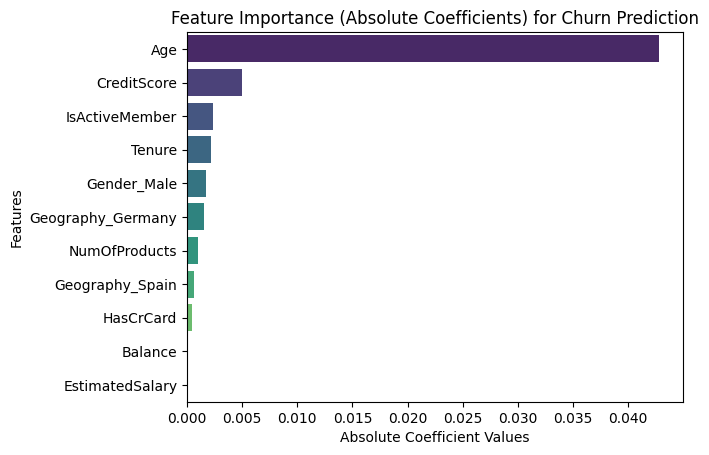

In [34]:
# 3. Visualize feature Importance
plt.Figure(figsize=(8,6))
sns.barplot(x='Absolute_Coefficients', y='Features', data=feaures_importance_df, hue='Features', legend=False, palette='viridis')
plt.title('Feature Importance (Absolute Coefficients) for Churn Prediction')
plt.xlabel('Absolute Coefficient Values')
plt.ylabel('Features')
plt.show()


In [35]:
print("\nFeature importance analysis complete!")
print("The positive coefficients indicate features that increase the likelihood of churn.")
print("The negative coefficients indicate features that decrease the likelihood of churn.")
print("The magnitude of the coefficient indicates the strength of the influence.")


Feature importance analysis complete!
The positive coefficients indicate features that increase the likelihood of churn.
The negative coefficients indicate features that decrease the likelihood of churn.
The magnitude of the coefficient indicates the strength of the influence.
